Implementing K-Means Clustering

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[iris.feature_names])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(data['species'], data['cluster'])

In [8]:
cluster_to_species = {0: 1, 1: 0, 2: 2}
data['mapped_cluster'] = data['cluster'].map(cluster_to_species)

In [9]:
accuracy = accuracy_score(data['species'], data['mapped_cluster'])

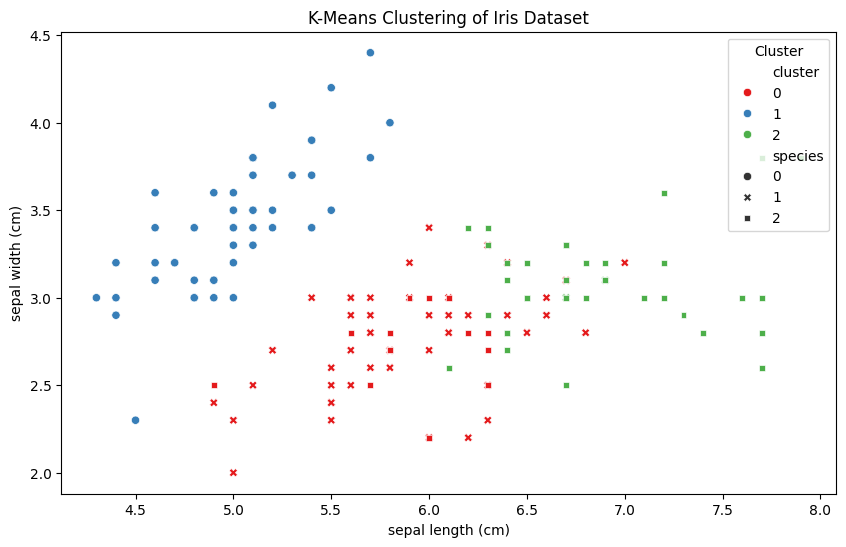

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data[iris.feature_names[0]], y=data[iris.feature_names[1]], hue=data['cluster'], palette='Set1', style=data['species'])
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')
plt.show()

In [12]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]
Accuracy: 0.8933333333333333


Choosing the Optimal Number of Clusters


In [13]:
from sklearn.metrics import silhouette_score
sse = []
silhouette_scores = []
cluster_range = range(2, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[iris.feature_names])
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data[iris.feature_names], kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

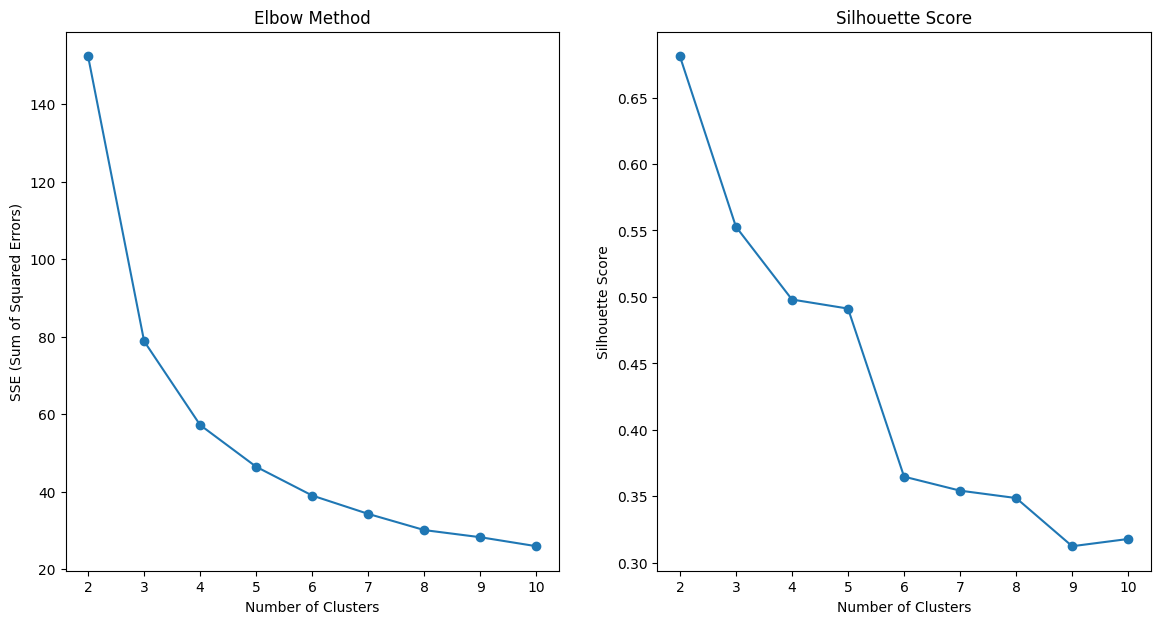

In [20]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Cluster Visualization with PCA

In [21]:
from sklearn.decomposition import PCA
data['species'] = iris.target
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[iris.feature_names])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[iris.feature_names])
data_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_pca['cluster'] = data['cluster']
data_pca['species'] = data['species']

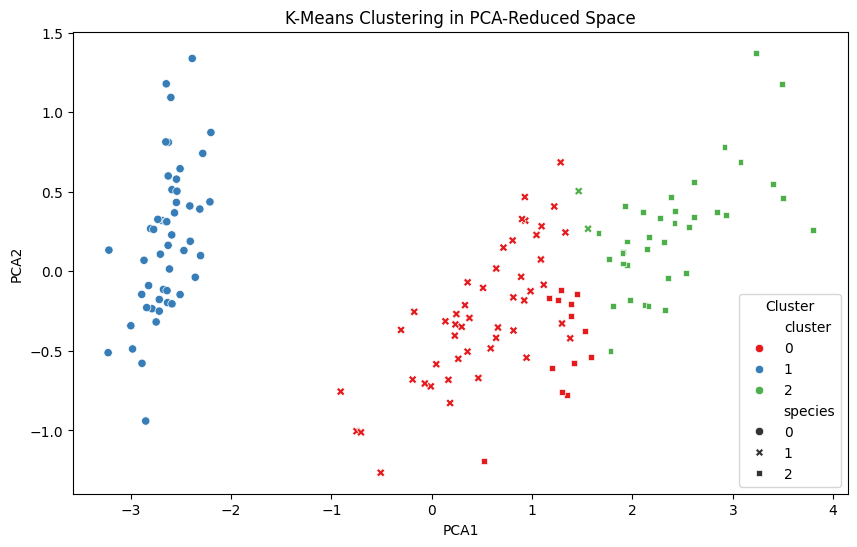

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', palette='Set1', style='species', data=data_pca)
plt.title('K-Means Clustering in PCA-Reduced Space')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

Hierarchical Clustering: Dendrogram

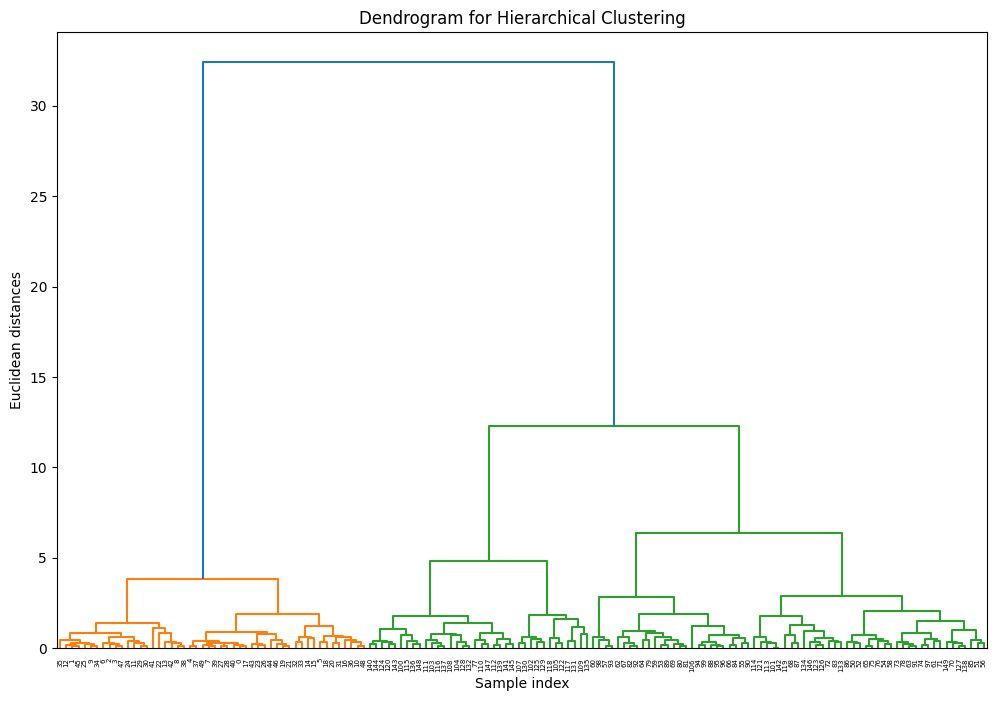

In [24]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 8))
dend = shc.dendrogram(shc.linkage(data[iris.feature_names], method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distances')
plt.show()

Comparing Clustering Algorithms

In [41]:
cluster_to_species = {0: 1, 1: 0, 2: 2}
data['mapped_kmeans_cluster'] = data['kmeans_cluster'].map(cluster_to_species)

In [42]:
from sklearn.cluster import KMeans, AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
data['agg_cluster'] = agg_clustering.fit_predict(data[iris.feature_names])

In [47]:
conf_matrix_kmeans = confusion_matrix(data['species'], data['mapped_kmeans_cluster'])
conf_matrix_agg = confusion_matrix(data['species'], data['agg_cluster'])

In [48]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score
ari_kmeans = adjusted_rand_score(data['species'], data['mapped_kmeans_cluster'])
ari_agg = adjusted_rand_score(data['species'], data['agg_cluster'])

In [49]:
print("Confusion Matrix for K-Means Clustering:\n", conf_matrix_kmeans)
print("Confusion Matrix for Agglomerative Hierarchical Clustering:\n", conf_matrix_agg)
print("Adjusted Rand Index (ARI) for K-Means Clustering:", ari_kmeans)
print("Adjusted Rand Index (ARI) for Agglomerative Hierarchical Clustering:", ari_agg)

Confusion Matrix for K-Means Clustering:
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
Confusion Matrix for Agglomerative Hierarchical Clustering:
 [[ 0 50  0]
 [49  0  1]
 [15  0 35]]
Adjusted Rand Index (ARI) for K-Means Clustering: 0.7302382722834697
Adjusted Rand Index (ARI) for Agglomerative Hierarchical Clustering: 0.7311985567707746


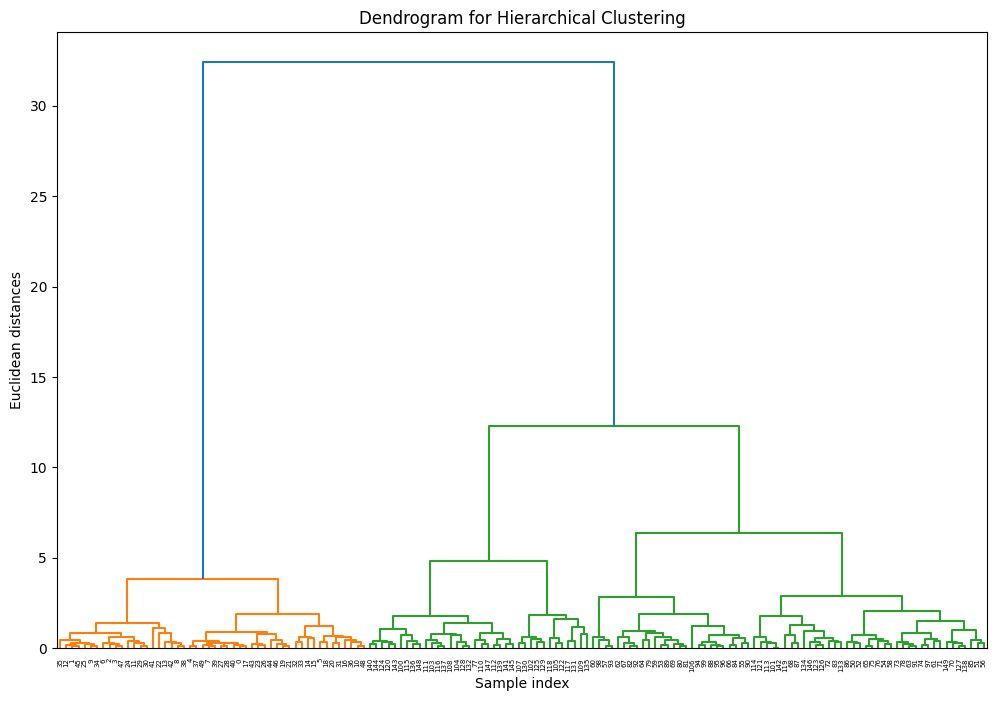

In [50]:
plt.figure(figsize=(12, 8))
dend = shc.dendrogram(shc.linkage(data[iris.feature_names], method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distances')
plt.show()

In [51]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[iris.feature_names])
data_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_pca['kmeans_cluster'] = data['kmeans_cluster']
data_pca['agg_cluster'] = data['agg_cluster']
data_pca['species'] = data['species']

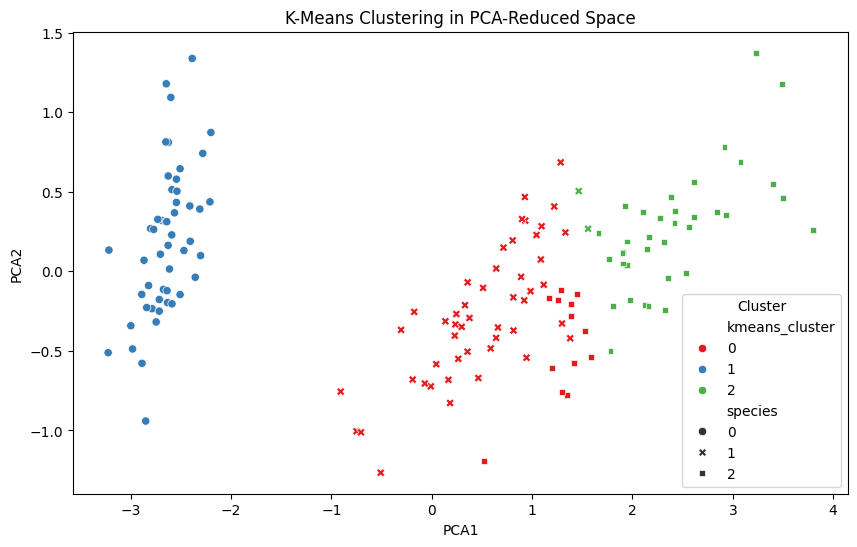

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='kmeans_cluster', palette='Set1', style='species', data=data_pca)
plt.title('K-Means Clustering in PCA-Reduced Space')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

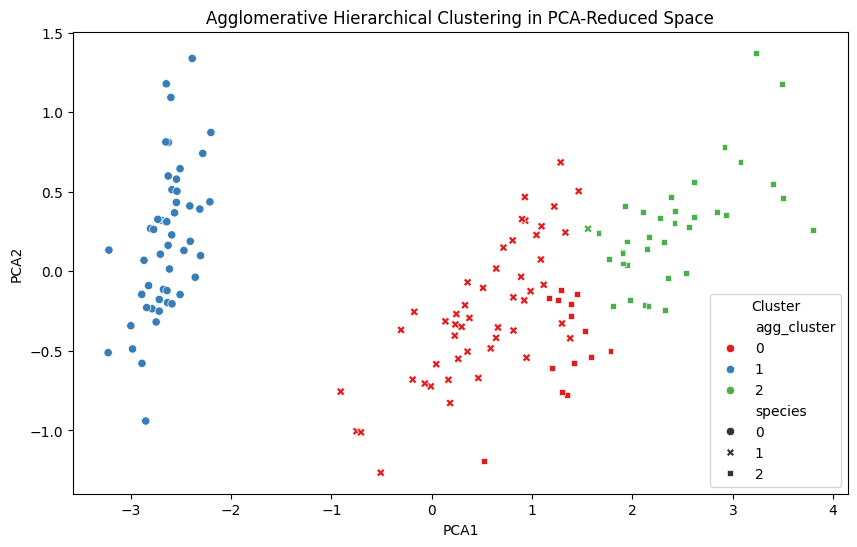

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='agg_cluster', palette='Set1', style='species', data=data_pca)
plt.title('Agglomerative Hierarchical Clustering in PCA-Reduced Space')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

K-Means Clustering:
Strengths:
    Efficiency: K-Means is computationally efficient, especially with large datasets.
    Scalability: It scales well with a large number of samples.
    Simple Implementation: It is easy to implement and understand.
    Centroid-based: Works well when clusters are spherical and of similar sizes.
Weaknesses:
    Sensitive to Initialization: Results can vary based on the initial centroids.
    Fixed Number of Clusters: Requires the number of clusters to be specified in advance.
    Not Good for Complex Shapes: It may not perform well with clusters that have non-spherical shapes or varying densities.

Agglomerative Hierarchical Clustering:
Strengths:
    Dendrograms: Provides a dendrogram that helps visualize the clustering process and decide the number of clusters.
    No Need to Pre-specify Clusters: Does not require the number of clusters to be specified beforehand.
    Flexible: Can capture clusters of arbitrary shapes and sizes.
Weaknesses:
    Computationally Intensive: Can be computationally expensive, especially with large datasets.
    Scalability Issues: Does not scale well with a large number of samples.
    Sensitive to Noise and Outliers: Can be affected by noisy data and outliers.